# Question 2 Milestone 2

In [31]:
import sys
import os
sys.path.append(os.path.abspath("../.."))
from ift6758.features.data_engeneering_1 import get_multiple_season_df, goal_or_not, get_net_situation, get_shots_angle_and_distance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Training Data

In [32]:
df = pd.read_csv('../../games_data/feature_dataset_1_train.csv')
display(df.head(10))

,Distance,Angle,Goal,Empty Net
0,55.9,10.3,0,0
1,38.4,38.7,0,0
2,53.2,28.0,0,0
3,11.7,70.0,0,0
4,10.0,0.0,0,0
5,12.8,51.3,0,0
6,26.2,72.3,0,0
7,8.2,76.0,0,0
8,11.4,37.9,0,0
9,40.3,7.1,0,0


## Histogramme du nombre de tirs (buts et non-buts séparés), regroupées par distance

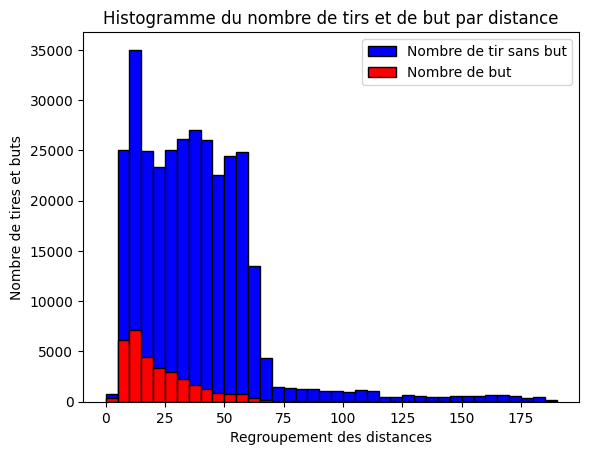

In [33]:
goal = df[df["Goal"] == 1]["Distance"]
no_goal = df[df["Goal"] == 0]["Distance"]
bin_size = 5


bin = range(0, int(df["Distance"].max()) + bin_size, bin_size)

plt.figure()
plt.hist(no_goal, bin, color="blue", label="Nombre de tir sans but", edgecolor='black')
plt.hist(goal, bin, color="red", label="Nombre de but", edgecolor='black')

plt.title("Histogramme du nombre de tirs et de but par distance")
plt.xlabel("Regroupement des distances")
plt.ylabel("Nombre de tires et buts")
plt.legend()
plt.show()




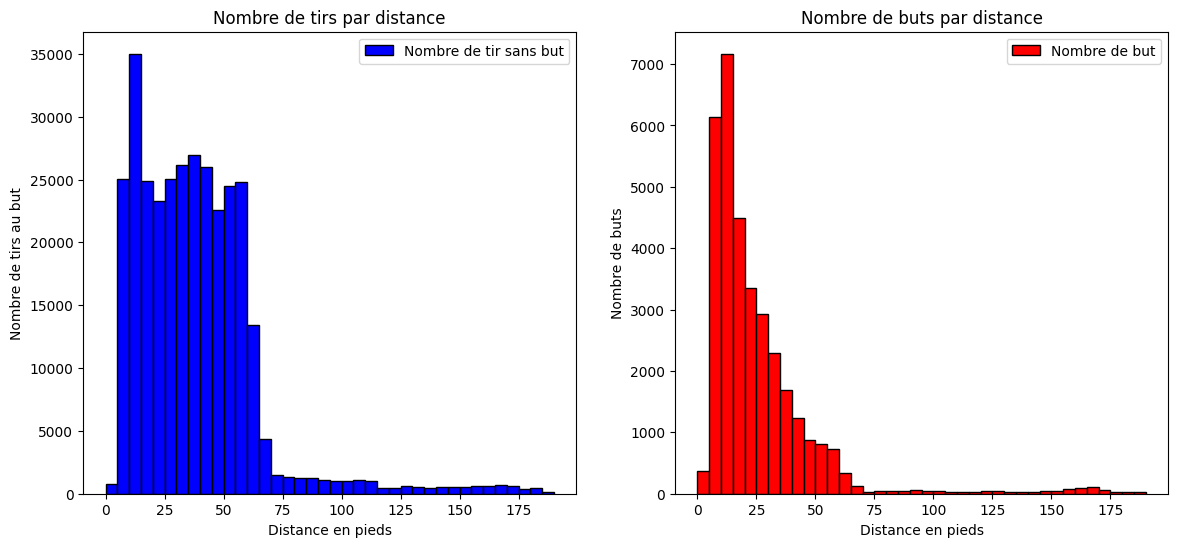

In [34]:
goal = df[df["Goal"] == 1]["Distance"]
no_goal = df[df["Goal"] == 0]["Distance"]
bin_size = 5


bin_goal = range(0, int(goal.max()) + bin_size, bin_size)
bin_no_goal = range(0, int(no_goal.max()) + bin_size, bin_size)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].hist(no_goal, bin_goal, color="blue", label="Nombre de tir sans but", edgecolor='black')
axes[1].hist(goal, bin_no_goal, color="red", label="Nombre de but", edgecolor='black')

axes[0].set_title("Nombre de tirs par distance")
axes[0].set_ylabel("Nombre de tirs au but")
axes[0].set_xlabel("Distance en pieds")
axes[0].legend()

axes[1].set_title("Nombre de buts par distance")
axes[1].set_ylabel("Nombre de buts")
axes[1].set_xlabel("Distance en pieds")
axes[1].legend()

plt.show()




## Histogramme du nombre de tirs (buts et non-buts séparés), regroupées par angle

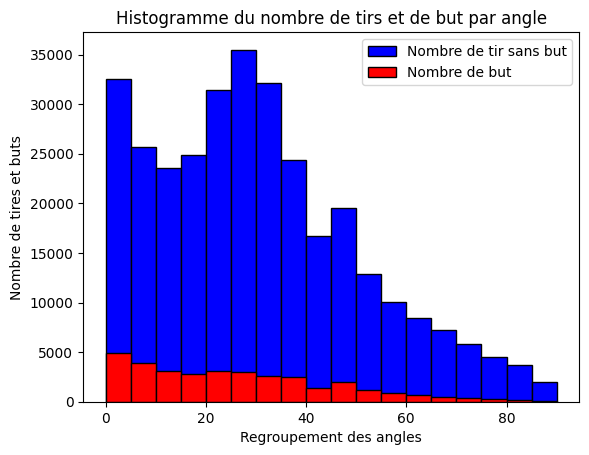

In [35]:
goal = df[df["Goal"] == 1]["Angle"]
no_goal = df[df["Goal"] == 0]["Angle"]
bin_size = 5


bin = range(0, int(df["Angle"].max()) + bin_size, bin_size)

plt.figure()
plt.hist(no_goal, bin, color="blue", label="Nombre de tir sans but", edgecolor='black')
plt.hist(goal, bin, color="red", label="Nombre de but", edgecolor='black')

plt.title("Histogramme du nombre de tirs et de but par angle")
plt.xlabel("Regroupement des angles")
plt.ylabel("Nombre de tires et buts")
plt.legend()
plt.show()




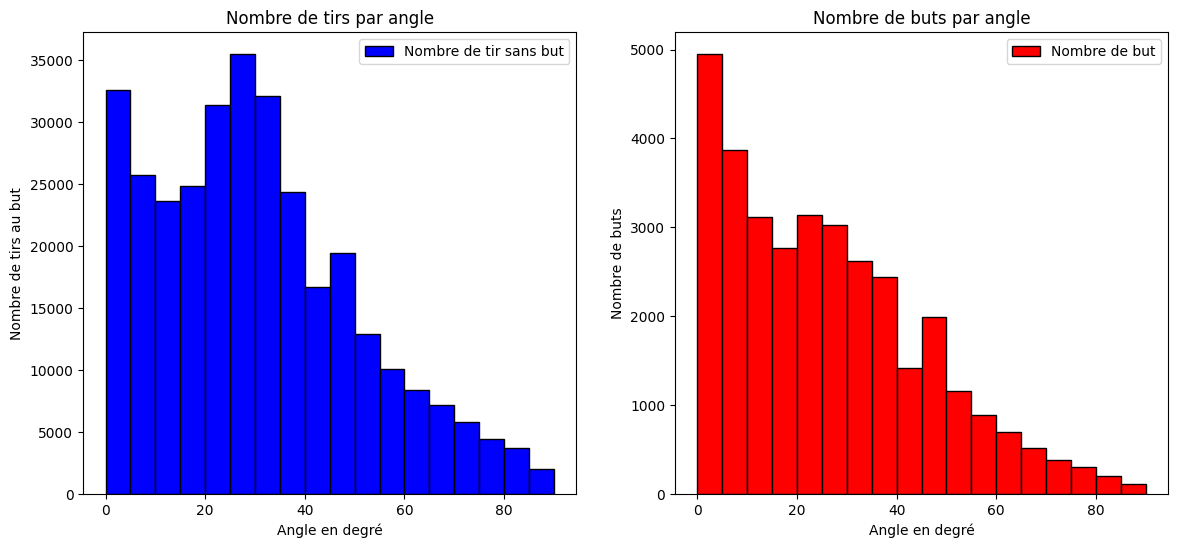

In [36]:
goal = df[df["Goal"] == 1]["Angle"]
no_goal = df[df["Goal"] == 0]["Angle"]
bin_size = 5


bin_goal = range(0, int(goal.max()) + bin_size, bin_size)
bin_no_goal = range(0, int(no_goal.max()) + bin_size, bin_size)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].hist(no_goal, bin_goal, color="blue", label="Nombre de tir sans but", edgecolor='black')
axes[1].hist(goal, bin_no_goal, color="red", label="Nombre de but", edgecolor='black')

axes[0].set_title("Nombre de tirs par angle")
axes[0].set_ylabel("Nombre de tirs au but")
axes[0].set_xlabel("Angle en degré")
axes[0].legend()

axes[1].set_title("Nombre de buts par angle")
axes[1].set_ylabel("Nombre de buts")
axes[1].set_xlabel("Angle en degré")
axes[1].legend()

plt.show()




## Histogramme de la relation entre distance et angle

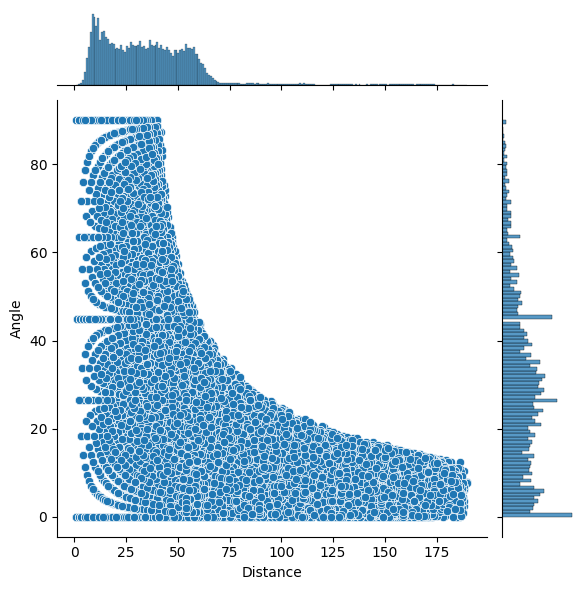

In [37]:

sns.jointplot(data=df, x="Distance", y="Angle")




## Taux de but par rapport à la distance

C:\Users\remla\AppData\Local\Temp\ipykernel_15516\3539660097.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df_taux.groupby('Distance bin')


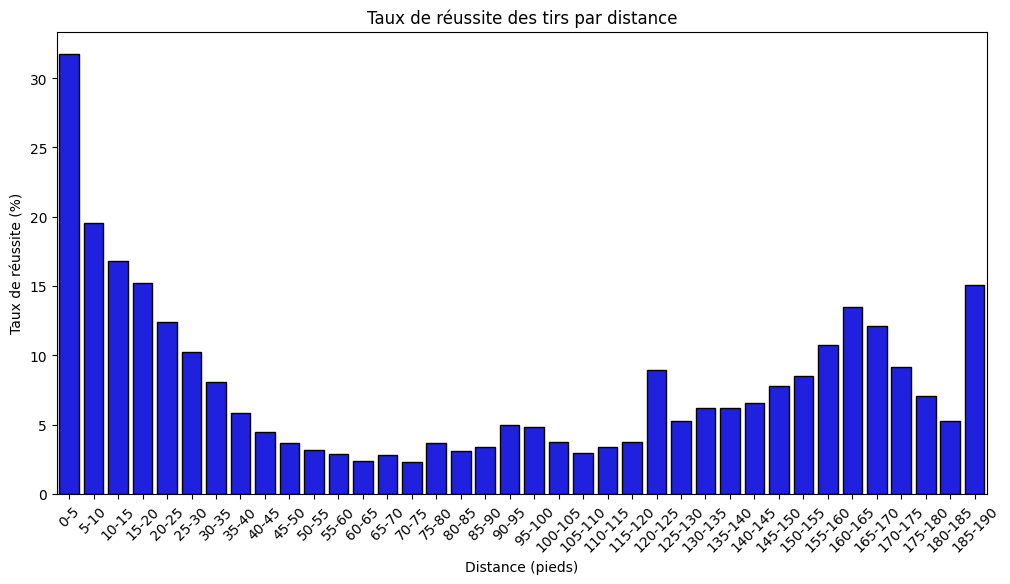

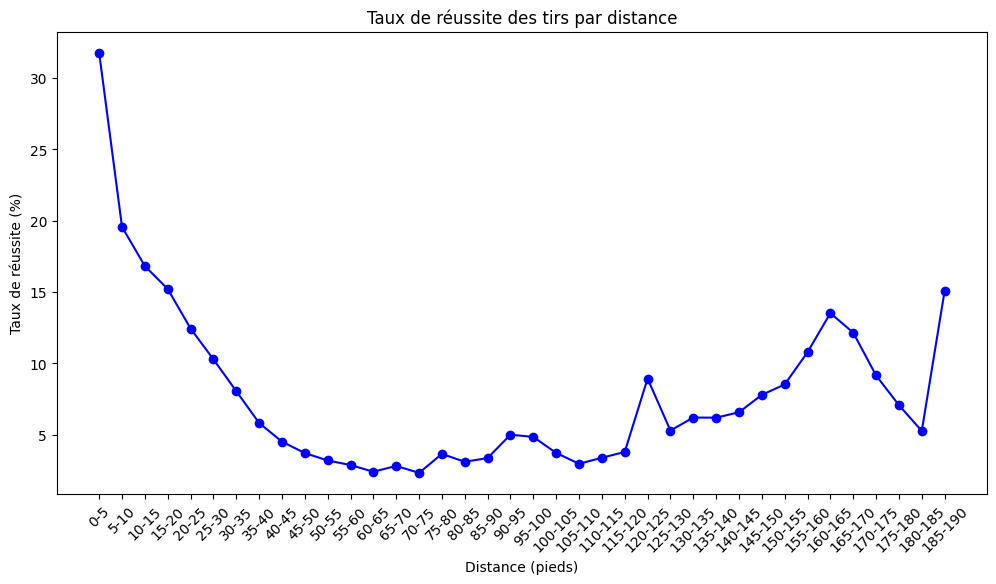

In [38]:
df_taux = df.copy()

bin_distance = range(0, int(df_taux["Distance"].max()) + bin_size, bin_size)


label = [f'{bin_distance[i]}-{bin_distance[i+1]}' for i in range(len(bin_distance)-1)]
df_taux['Distance bin'] = pd.cut(df_taux["Distance"], bins=bin_distance, labels=label)
df_group = df_taux.groupby('Distance bin')


taux = df_group["Goal"].agg(
    nbr_tir_totaux='count',
    nbr_but='sum'
).reset_index()

taux['Taux but'] = (taux['nbr_but'] / taux['nbr_tir_totaux'] * 100).round(2)

plt.figure(figsize=(12,6))
sns.barplot(x=taux['Distance bin'], y=taux['Taux but'], color='blue', edgecolor='black')
plt.title("Taux de réussite des tirs par distance")
plt.xlabel("Distance (pieds)")
plt.xticks(rotation=45)
plt.ylabel("Taux de réussite (%)")
plt.show()


plt.figure(figsize=(12,6))
plt.plot(taux['Distance bin'], taux['Taux but'], marker='o', color='blue')
plt.title("Taux de réussite des tirs par distance")
plt.xlabel("Distance (pieds)")
plt.xticks(rotation=45)
plt.ylabel("Taux de réussite (%)")
plt.show()

## Taux de but par rapport à l'angle

C:\Users\remla\AppData\Local\Temp\ipykernel_15516\4242707386.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_group = df_taux.groupby('Angle bin')


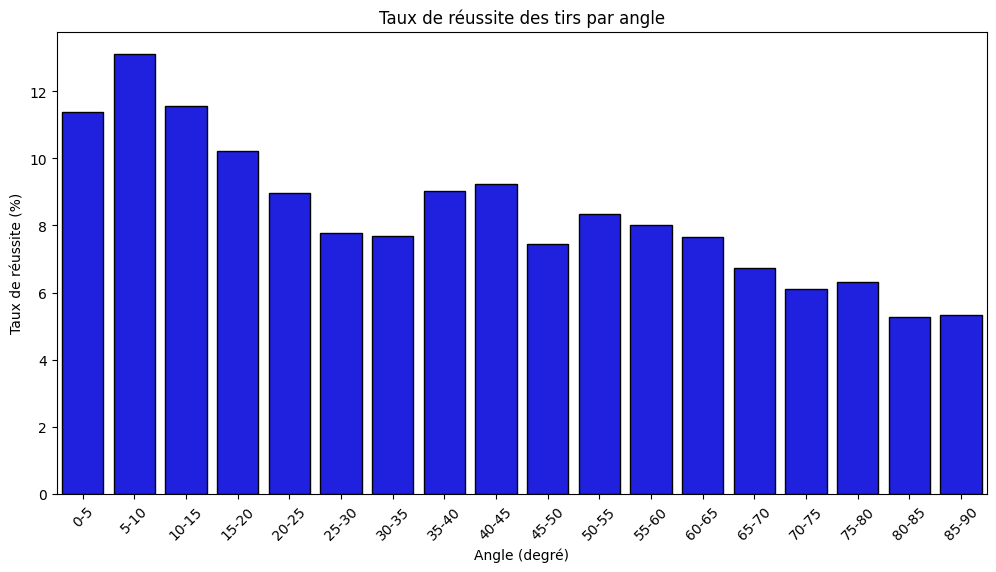

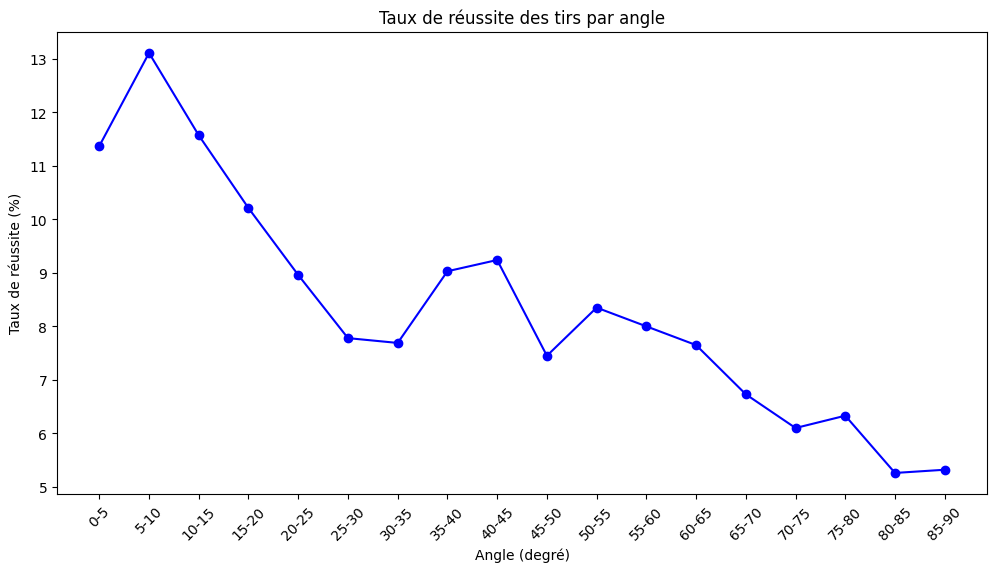

In [39]:
df_taux = df.copy()

bin_angle = range(0, int(df_taux["Angle"].max()) + bin_size, bin_size)


label = [f'{bin_angle[i]}-{bin_angle[i+1]}' for i in range(len(bin_angle)-1)]
df_taux['Angle bin'] = pd.cut(df_taux["Angle"], bins=bin_angle, labels=label)
df_group = df_taux.groupby('Angle bin')


taux = df_group["Goal"].agg(
    nbr_tir_totaux='count',
    nbr_but='sum'
).reset_index()

taux['Taux but'] = (taux['nbr_but'] / taux['nbr_tir_totaux'] * 100).round(2)

plt.figure(figsize=(12,6))
sns.barplot(x=taux['Angle bin'], y=taux['Taux but'], color='blue', edgecolor='black')
plt.title("Taux de réussite des tirs par angle")
plt.xlabel("Angle (degré)")
plt.xticks(rotation=45)
plt.ylabel("Taux de réussite (%)")
plt.show()


plt.figure(figsize=(12,6))
plt.plot(taux['Angle bin'], taux['Taux but'], marker='o', color='blue')
plt.title("Taux de réussite des tirs par angle")
plt.xlabel("Angle (degré)")
plt.xticks(rotation=45)
plt.ylabel("Taux de réussite (%)")
plt.show()

## But marqué de loin sans filet vide

1576


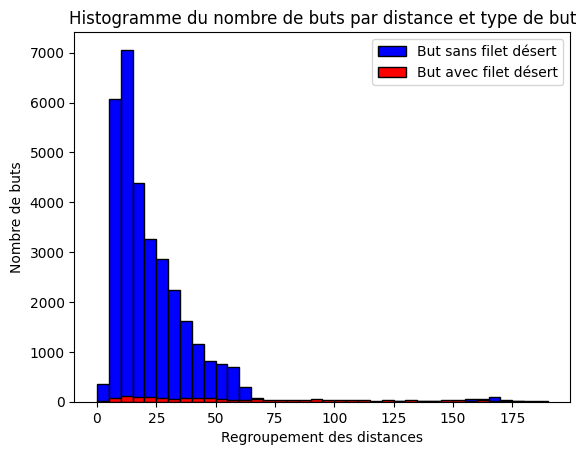

In [40]:
goal = df[df["Goal"] == 1]
bin_size = 5
bin = range(0, int(goal["Distance"].max()) + bin_size, bin_size)

goal_empty_net = goal[goal["Empty Net"] == 1]["Distance"]
goal_not_empty_net = goal[goal["Empty Net"] == 0]["Distance"]
print(len(goal_empty_net))
plt.figure()
plt.hist(goal_not_empty_net, bin, color="blue", label="But sans filet désert", edgecolor='black')
plt.hist(goal_empty_net, bin, color="red", label="But avec filet désert", edgecolor='black')
plt.title("Histogramme du nombre de buts par distance et type de but")
plt.xlabel("Regroupement des distances")
plt.ylabel("Nombre de buts")
plt.legend()
plt.show()


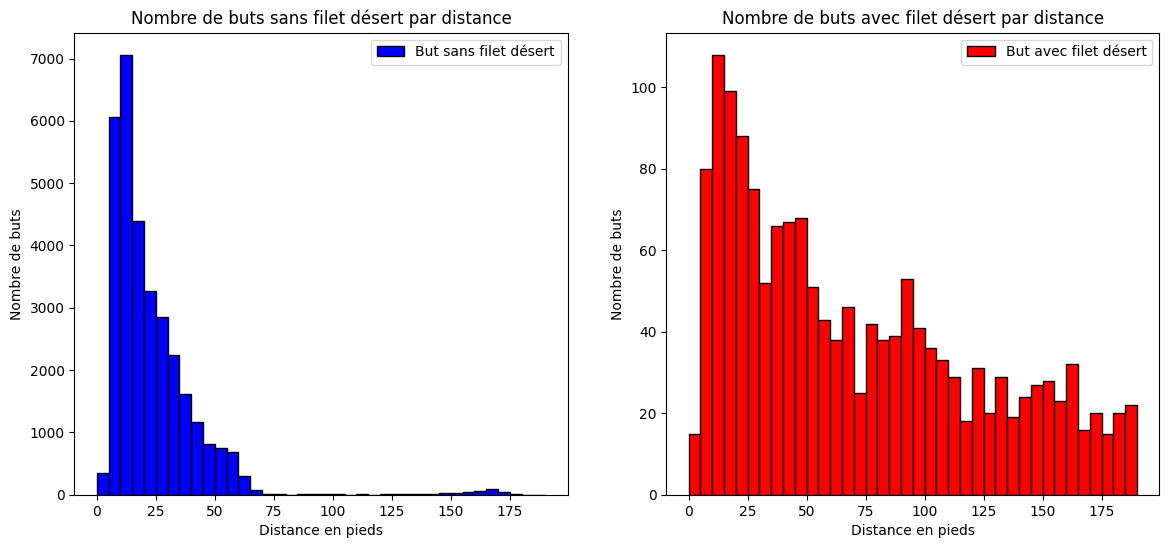

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].hist(goal_not_empty_net, bin, color="blue", label="But sans filet désert", edgecolor='black')
axes[1].hist(goal_empty_net, bin, color="red", label="But avec filet désert", edgecolor='black')
axes[0].set_title("Nombre de buts sans filet désert par distance")
axes[0].set_ylabel("Nombre de buts")
axes[0].set_xlabel("Distance en pieds")
axes[0].legend()
axes[1].set_title("Nombre de buts avec filet désert par distance")
axes[1].set_ylabel("Nombre de buts")
axes[1].set_xlabel("Distance en pieds")
axes[1].legend()
plt.show()

## Check des valeurs abérantes

In [ ]:
print(goal_not_empty_net[goal_not_empty_net > 100])
seasons = ["2016-2017", "2017-2018", "2018-2019", "2019-2020"]
df_observation = get_shots_angle_and_distance(seasons)
df_observation = goal_or_not(df_observation)
df_observation = get_net_situation(df_observation)
display(df_observation.loc[(df_observation["Goal"] == 1) & (df_observation["Empty Net"] == 0) & (df_observation["Distance"] > 100), [
'Game ID', 'X', 'Y', 'Distance', 'Angle', 'Empty Net', 'Event Type', 'Team', 'Zone', 'ID'
]])

display(df_observation.loc[(df_observation["Goal"] == 1) & (df_observation["Empty Net"] == 1) & (df_observation["Distance"] > 100), [
'Game ID', 'X', 'Y', 'Distance', 'Angle', 'Empty Net', 'Event Type', 'Team', 'Zone', 'ID'
]])



1676      156.2
2325      165.1
2328      175.3
3106      152.5
6869      123.8
          ...  
283992    164.5
298033    128.1
316132    125.2
334767    168.5
354521    176.3
Name: Distance, Length: 364, dtype: float64
